<a href="https://colab.research.google.com/github/L-Shyamal/EN2550-Assignment_1/blob/main/assigment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Mounted at /gdrive
/gdrive


In [8]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


Original Image


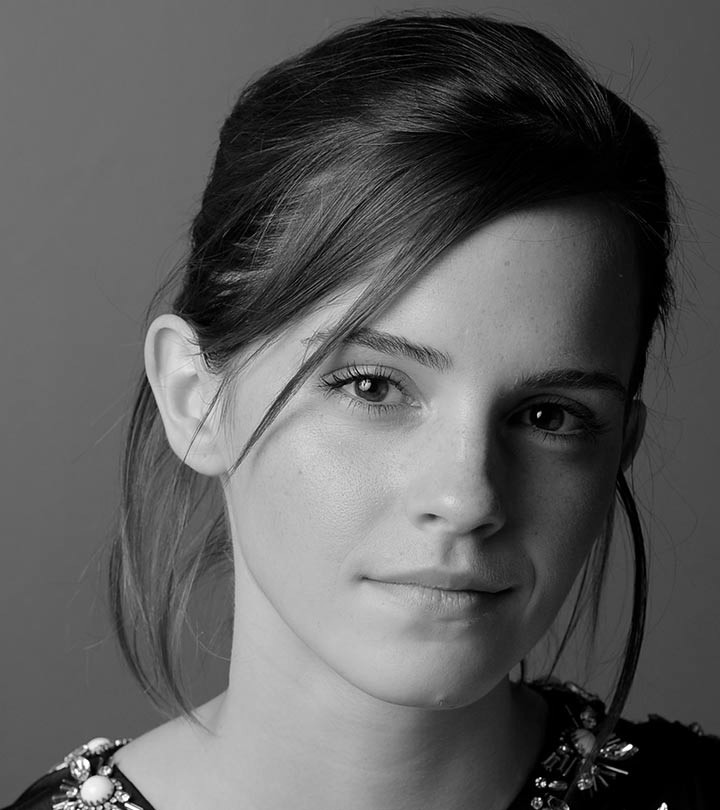

Transformed Image


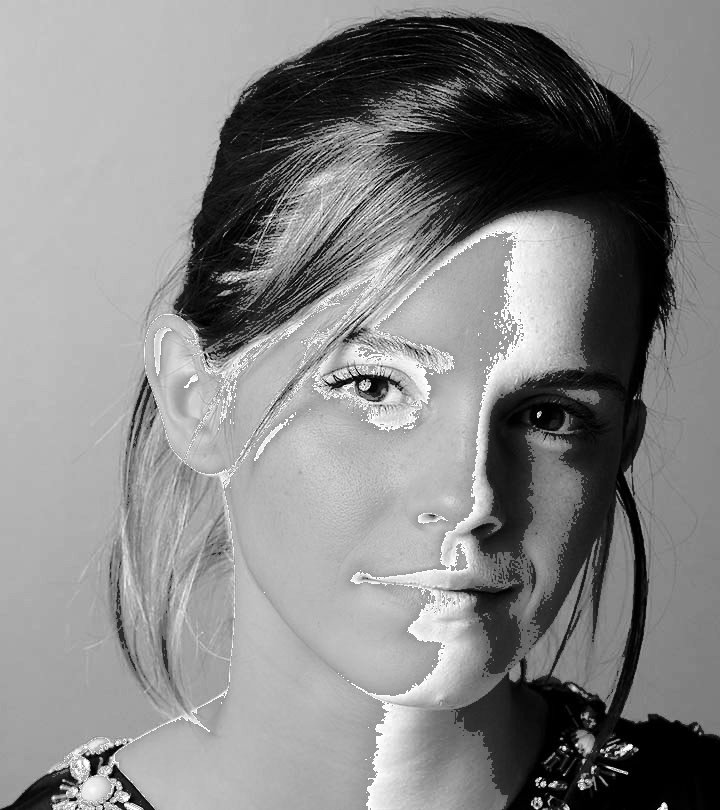

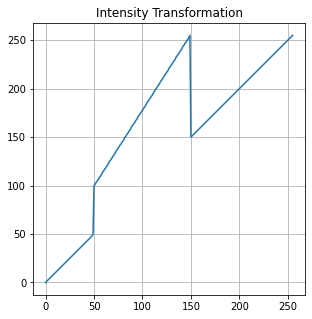

In [10]:
img = cv.imread("/content/drive/MyDrive/Assignment1/emma_gray.jpg")

t1 = np.linspace(0,50,50)
t2 = np.linspace(50,100,0)
t3 = np.linspace(100,255,100)
t4 = np.linspace(255,150,0)
t5 = np.linspace(150,255,106)

t = np.concatenate((t1,t2,t3,t4,t5),axis=0).astype(np.uint8)
fig,ax = plt.subplots(figsize=(5,5))
ax.set_title("Intensity Transformation")
ax.grid()
ax.plot(t)

ax.set_aspect("equal")
assert len(t) ==256
g = cv.LUT(img,t)

print("Original Image")
cv2_imshow(img)
print("Transformed Image")
cv2_imshow(g)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Original Image


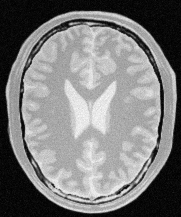

Transformed Image


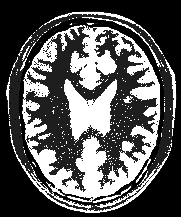

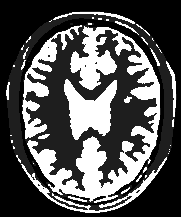

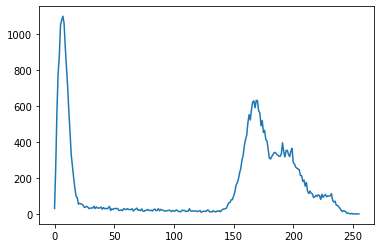

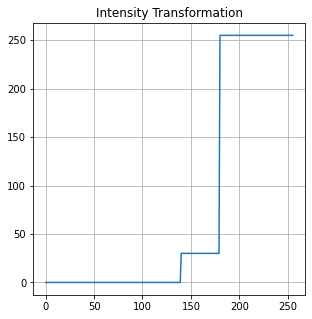

In [51]:
brain = cv.imread("/content/drive/MyDrive/Assignment1/brain_proton_density_slice.png")


hist_brain = cv.calcHist([brain],[0],None,[256],[0, 256])
plt.plot(hist_brain)

t1 = np.linspace(0,0,140)
t2 = np.linspace(0,30,0)
t3 = np.linspace(30,30,40)
t4 = np.linspace(30,255,0)
t5 = np.linspace(255,255,76)

t = np.concatenate((t1,t2,t3,t4,t5),axis=0).astype(np.uint8)

fig,ax = plt.subplots(figsize=(5,5))
ax.set_title("Intensity Transformation")
ax.grid()
ax.plot(t)
ax.set_aspect("equal")
assert len(t) ==256
g = cv.LUT(brain,t)

sand = cv.medianBlur(g,3)

print("Original Image")
cv2_imshow(brain)
print("Transformed Image")
cv2_imshow(g)
cv2_imshow(sand)